In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
res = pd.read_csv("./../result_mpi_polus.csv", sep=';')

In [22]:
res[res.Nthreads==1].sort_values(['RunType', 'Size'])

,Time,Nthreads,RunType,Size
0,0.481501,1,normal,10000
7,0.313790,1,normal,10000
14,0.259286,1,normal,10000
20,0.260297,1,normal,10000
26,0.273391,1,normal,10000
5,1.611940,1,normal,25000
11,1.528260,1,normal,25000
17,1.540170,1,normal,25000
24,1.255190,1,normal,25000
29,1.226400,1,normal,25000


In [23]:
p = res[res.RunType == 'problem'].drop(['RunType'], axis=1)

In [24]:
n = res[res.RunType == 'normal'].drop(['RunType'], axis=1)

In [25]:
p = p.groupby(['Size', 'Nthreads']).mean().reset_index()
p

,Size,Nthreads,Time
0,10000,1,0.262905
1,10000,2,0.319406
2,10000,4,0.565832
3,10000,8,0.742867
4,10000,16,1.562541
5,25000,1,1.138834
6,25000,2,1.435906
7,25000,4,3.021100
8,25000,8,3.832240
9,25000,16,6.434090


In [26]:
n = n.groupby(['Size', 'Nthreads']).mean().reset_index()
n

,Size,Nthreads,Time
0,10000,1,0.317653
1,10000,2,0.737862
2,10000,4,0.679973
3,10000,8,0.819513
4,10000,16,0.957532
5,25000,1,1.432392
6,25000,2,2.993620
7,25000,4,2.144878
8,25000,8,2.861160
9,25000,16,3.481960


AttributeError: module 'seaborn' has no attribute 'show'

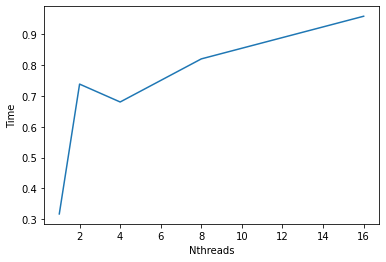

In [27]:
for size in n.Size.unique():
    sns.lineplot(data=n[n.Size == size], x='Nthreads', y='Time')
    sns.show()



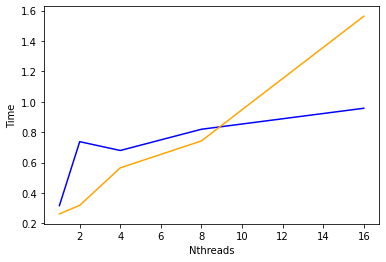

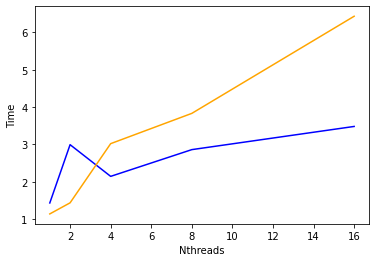

In [28]:
#fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 4*3))

# Loop over each column in the DataFrame
for i, size in enumerate(n.Size.unique()):
    
    # Select the data for the current column
    data = n[n.Size == size]
    data2 = p[p.Size == size]
    
    
    # Plot the data on the corresponding subplot
    sns.lineplot(data=data, x='Nthreads', y='Time', color='blue')
    sns.lineplot(data=data2, x='Nthreads', y='Time', color='orange')
    plt.show()
    #axes[i].set_title(column)

In [29]:
res = n.merge(p, left_on=['Nthreads', 'Size'], right_on=['Nthreads', 'Size'])

In [30]:
res.columns = ['Size', 'Nthreads', 'Time_Normal', 'Time_Problem']

In [31]:
res['diff'] = res.Time_Problem - res.Time_Normal

In [32]:
res#.groupby(['MatrixSize']).expanding().min()

,Size,Nthreads,Time_Normal,Time_Problem,diff
0,10000,1,0.317653,0.262905,-0.054748
1,10000,2,0.737862,0.319406,-0.418457
2,10000,4,0.679973,0.565832,-0.114141
3,10000,8,0.819513,0.742867,-0.076646
4,10000,16,0.957532,1.562541,0.605009
5,25000,1,1.432392,1.138834,-0.293558
6,25000,2,2.993620,1.435906,-1.557714
7,25000,4,2.144878,3.021100,0.876222
8,25000,8,2.861160,3.832240,0.971080
9,25000,16,3.481960,6.434090,2.952130


In [33]:
res['Efficiency_With'] = res.Time_With / res.Nthreads
res['Efficiency_Without'] = res.Time_Without / res.Nthreads

AttributeError: 'DataFrame' object has no attribute 'Time_With'

In [34]:
res.to_excel("./res_table.xlsx")

In [ ]:
res